In [1]:
import numpy as np
import xarray as xr
import json
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import metpy.calc as mcalc
from metpy.units import units
import metpy
import pygrib
import importlib

In [3]:
import sys
sys.path.append("/home/takato/Git/jma_radar/")
import jma_gsm
import custom_colormap
cmap=custom_colormap.get_jmacmap2()

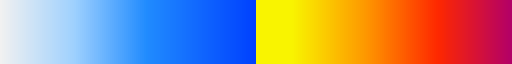

In [4]:
cmap=custom_colormap.get_jmacmap2()
cmap

In [32]:
importlib.reload(jma_gsm)

<module 'jma_gsm' from '/home/takato/Git/jma_radar/jma_gsm.py'>

In [33]:
gsm=jma_gsm.GSM_global()

In [26]:
ds_sfc=gsm.read_sfc("/home/takato/Data/JMA/GSM/Z__C_RJTD_20210815000000_GSM_GPV_Rgl_FD0012_grib2.bin",product_type="FCT",timestep=[0])

In [27]:
ds_sfc

<xarray.Dataset>
Dimensions:             (lat: 141, lon: 301)
Coordinates:
  * lat                 (lat) float64 70.0 69.5 69.0 68.5 ... 1.5 1.0 0.5 0.0
  * lon                 (lon) float64 60.0 60.5 61.0 61.5 ... 209.0 209.5 210.0
Data variables:
    pmsl                (lat, lon) float64 1.001e+05 1.001e+05 ... 1.013e+05
    ps                  (lat, lon) float64 9.964e+04 9.991e+04 ... 1.013e+05
    u10                 (lat, lon) float64 9.444 9.991 10.91 ... -7.103 -7.134
    v10                 (lat, lon) float64 -3.623 -3.967 -4.358 ... 0.908 0.908
    T2m                 (lat, lon) float64 283.2 283.2 283.3 ... 299.5 299.4
    rh2m                (lat, lon) float64 75.0 77.0 78.22 ... 79.25 79.25 79.91
    Low_cloud_cover     (lat, lon) float64 78.76 37.89 36.87 ... 29.54 14.01
    Medium_cloud_cover  (lat, lon) float64 78.76 37.89 36.87 ... 29.54 14.01
    High_cloud_cover    (lat, lon) float64 2.051 11.77 29.88 ... 0.0 0.0 0.0
    Total_cloud_cover   (lat, lon) float64 80.13 45.56 55.86 ... 38.33 24.02
    precip              (lat, lon) float64 0.5 0.5625 0.6875 ... 0.0 0.0 0.0

In [40]:
dslev=gsm.read_plev("/home/takato/Data/JMA/GSM/Z__C_RJTD_20210801000000_GSM_GPV_Rgl_FD0000_grib2.bin",timestep=[0])

In [41]:
dslev["T"]

<xarray.DataArray 'T' (level: 9, lat: 141, lon: 301)>
array([[[279.08401489, 279.14651489, 279.70901489, ..., 291.42776489,
         292.20901489, 293.02151489],
        [280.86526489, 280.45901489, 280.52151489, ..., 291.17776489,
         291.95901489, 293.11526489],
        [282.05276489, 281.74026489, 281.58401489, ..., 291.33401489,
         291.92776489, 292.95901489],
        ...,
        [298.67776489, 298.77151489, 298.86526489, ..., 298.61526489,
         298.61526489, 298.58401489],
        [298.70901489, 298.83401489, 298.92776489, ..., 298.61526489,
         298.55276489, 298.49026489],
        [298.80276489, 298.89651489, 298.99026489, ..., 298.74026489,
         298.64651489, 298.55276489]],

       [[280.77844238, 280.77844238, 280.77844238, ..., 285.40344238,
         285.93469238, 286.62219238],
        [280.43469238, 280.46594238, 280.49719238, ..., 285.90344238,
         286.37219238, 287.30969238],
        [281.18469238, 280.96594238, 280.77844238, ..., 286.77844238,
         287.18469238, 287.99719238],
...
        [218.28662109, 218.27099609, 218.25537109, ..., 219.52099609,
         219.48974609, 219.47412109],
        [218.25537109, 218.22412109, 218.19287109, ..., 219.47412109,
         219.47412109, 219.45849609],
        [218.23974609, 218.19287109, 218.16162109, ..., 219.39599609,
         219.45849609, 219.50537109]],

       [[230.2361145 , 230.2048645 , 230.1579895 , ..., 224.9392395 ,
         225.0798645 , 225.1111145 ],
        [229.9392395 , 230.0486145 , 230.1111145 , ..., 224.4861145 ,
         224.3923645 , 224.2048645 ],
        [229.4392395 , 229.5642395 , 229.6892395 , ..., 225.0798645 ,
         224.6111145 , 224.0017395 ],
        ...,
        [206.6111145 , 206.6579895 , 206.7204895 , ..., 206.8923645 ,
         206.7829895 , 206.6892395 ],
        [206.7517395 , 206.7986145 , 206.8923645 , ..., 207.0173645 ,
         206.8923645 , 206.7829895 ],
        [206.8611145 , 206.9079895 , 207.0017395 , ..., 207.1736145 ,
         207.0173645 , 206.8611145 ]]])
Coordinates:
  * level    (level) int64 1000 925 850 700 500 300 250 200 150
  * lat      (lat) float64 70.0 69.5 69.0 68.5 68.0 67.5 ... 2.0 1.5 1.0 0.5 0.0
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 208.5 209.0 209.5 210.0
Attributes:
    title:    Temperature
    units:    kelvin

In [42]:
jma_gsm.GSM_global.add_dew_point_depreession_equ_potential_T(dslev)
jma_gsm.GSM_global.add_wind_vorticity_omega(dslev)

/home/takato/miniconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/pint/numpy_func.py:303: RuntimeWarning: divide by zero encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)
/home/takato/miniconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/pint/quantity.py:1237: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [43]:
dslev

<xarray.Dataset>
Dimensions:  (lat: 141, level: 9, lon: 301)
Coordinates:
  * level    (level) int64 1000 925 850 700 500 300 250 200 150
  * lat      (lat) float64 70.0 69.5 69.0 68.5 68.0 67.5 ... 2.0 1.5 1.0 0.5 0.0
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 208.5 209.0 209.5 210.0
Data variables:
    hgt      (level, lat, lon) float64 19.35 20.1 20.6 ... 1.424e+04 1.424e+04
    u        (level, lat, lon) float64 -1.667 -1.729 -1.854 ... -9.219 -9.156
    v        (level, lat, lon) float64 0.1331 0.4456 0.7268 ... -2.54 -2.54
    T        (level, lat, lon) float64 279.1 279.1 279.7 ... 207.2 207.0 206.9
    w        (level, lat, lon) float64 -0.02415 -0.004619 ... -0.0217 -0.01682
    rh       (level, lat, lon) float64 99.25 99.91 99.91 99.12 ... 0.0 0.0 0.0
    Tw       (level, lat, lon) float64 279.0 279.1 279.7 280.3 ... nan nan nan
    T-Tw     (level, lat, lon) float64 0.109 0.01372 0.01378 ... nan nan nan
    theta_w  (lat, lon) float64 <Quantity([[300.50579731 300.4206668  300.359...
    vo       (level, lat, lon) float64 <Quantity([[[-3.04346842e-05  8.407013...
    wind     (level, lat, lon) float64 1.672 1.786 1.992 ... 9.461 9.562 9.502
    vp       (level, lat, lon) float64 -0.8694 -0.1663 0.115 ... -0.7812 -0.6055

In [74]:
importlib.reload(jma_gsm)

<module 'jma_gsm' from '/home/takato/Git/jma_radar/jma_gsm.py'>

In [75]:
wmap=jma_gsm.Wheather_map()

In [76]:
wmap.figsize=(12,8)

In [77]:
import scipy.ndimage as ndimage

(<Figure size 864x576 with 1 Axes>, <GeoAxesSubplot:title={'center':'500hPa'}>)

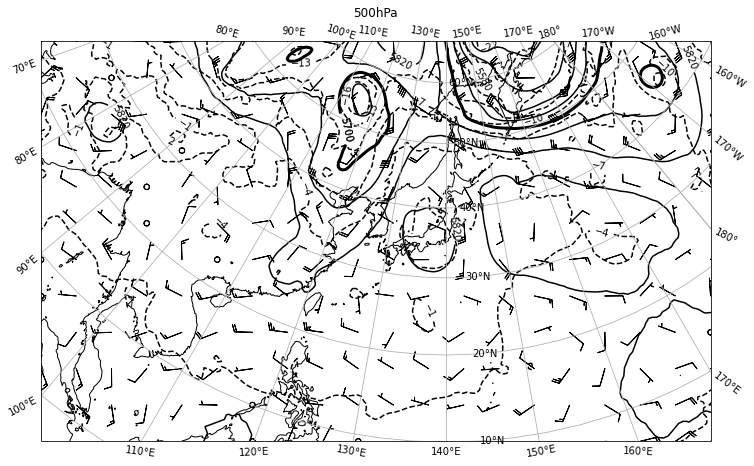

In [78]:
wmap.plot_500hPa_map(dslev)

(<Figure size 864x576 with 1 Axes>, <GeoAxesSubplot:title={'center':'850hPa'}>)

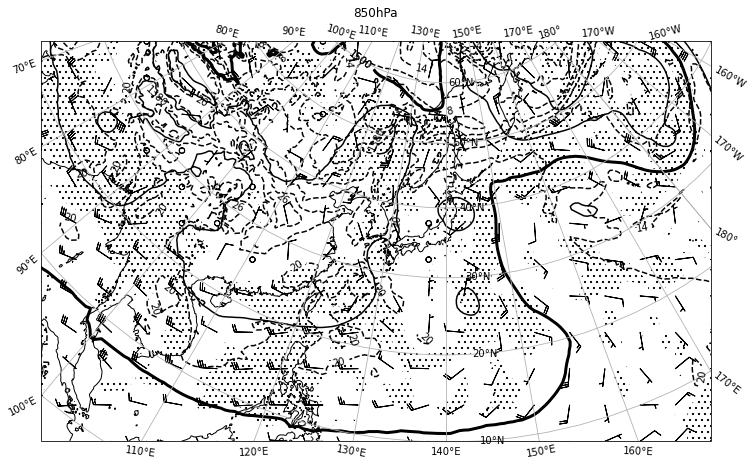

In [67]:
wmap.plot_850hPa_map(dslev)

(<Figure size 864x576 with 1 Axes>, <GeoAxesSubplot:title={'center':'700hPa'}>)

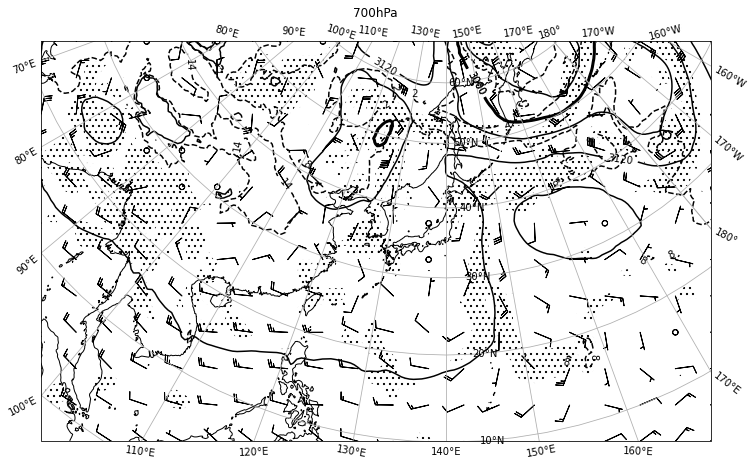

In [68]:
wmap.plot_700hPa_map(dslev)

(<Figure size 864x576 with 1 Axes>, <GeoAxesSubplot:title={'center':'300hPa'}>)

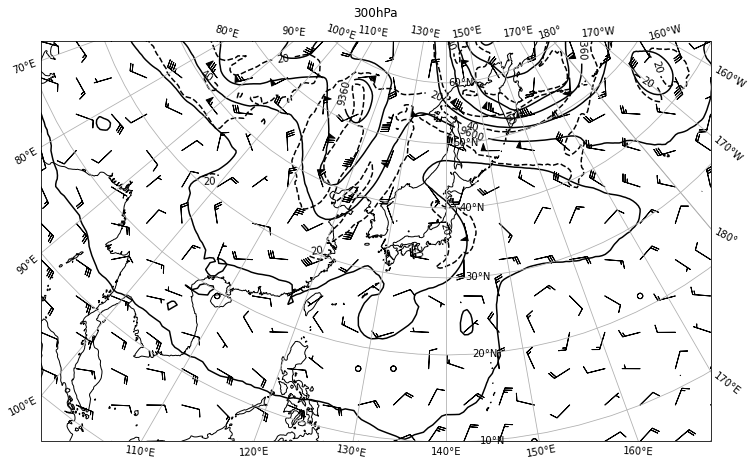

In [69]:
wmap.plot_300hPa_map(dslev)

(<Figure size 864x576 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'500hPa height_vorticity'}>)

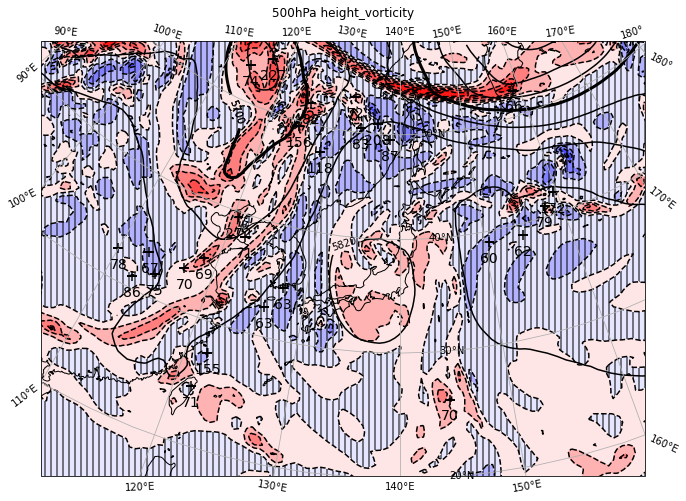

In [70]:
wmap.plot_500hPa_vo_map(dslev)

(<Figure size 864x576 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'surface precip_pressure_wind'}>)

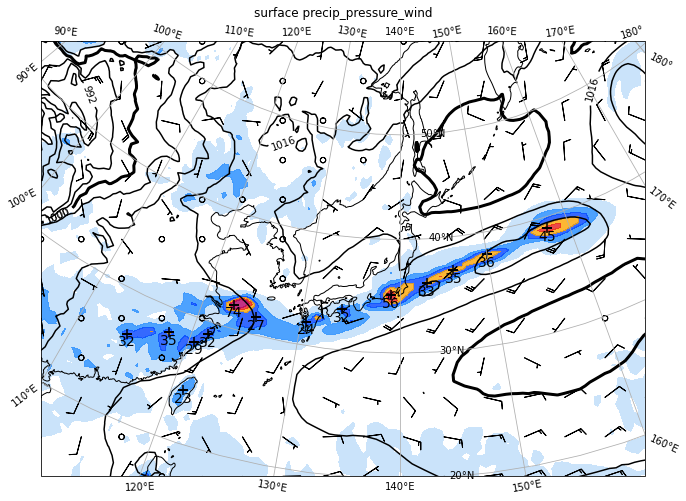

In [71]:
wmap.plot_surface_ps_wind_precip(ds_sfc,cmap=cmap)

(<Figure size 864x576 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'500hPa T 700hPa dew point depreesion'}>)

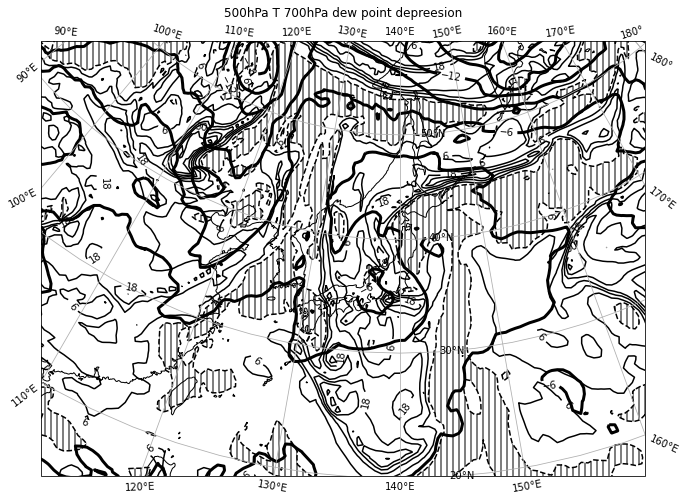

In [72]:
wmap.plot_500hPa_T_700hPa_dew_point_depression(dslev)

(<Figure size 864x576 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'850hPa wind equ potential temperature'}>)

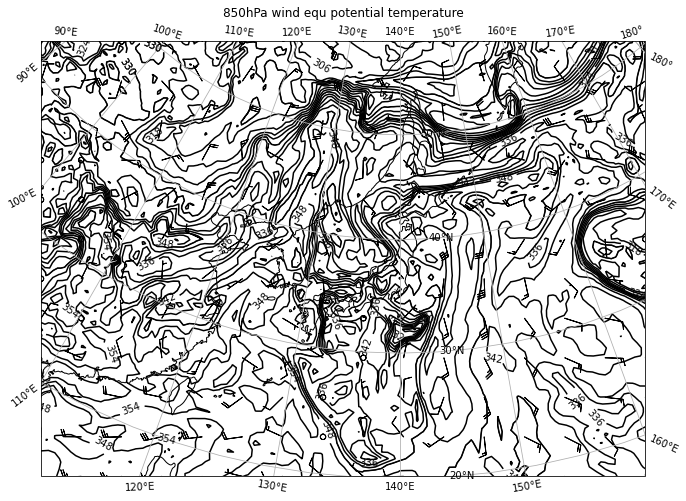

In [73]:
wmap.plot_850hPa_wind_equ_potential_temperature(dslev)